
Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

What metric would you report for this dataset?

What is its value?

ANSWER:
When looking at the sample data, there are outliers that heavily skew the overall AOV across all the sneaker shops on Shopify. As a result, it would be more beneficial if we looked at the AOV for each store or remove the outliers and calculate the overall AOV from the remaining orders. 

In [37]:
import pandas as pd

sales = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
ord_desc = sales['order_amount'].describe()
ord_desc

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

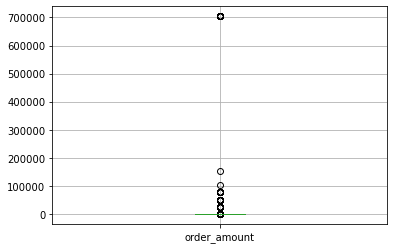

In [42]:
sales.boxplot(column='order_amount')

The box plot for the order amounts corresponds to the large standard deviation and max value in the description of that column. As a result, if we group each shop individually it allows for the outliers to be separated from the general data, as it is possible they are from the same store. 

In [49]:
sales.groupby('shop_id').mean(['order_amount','total_items']).sort_values('order_amount',ascending=False).reset_index()[['shop_id','order_amount','total_items']]

,shop_id,order_amount,total_items
0,42,235101.490196,667.901961
1,78,49213.043478,1.913043
2,50,403.545455,2.090909
3,90,403.224490,2.265306
4,38,390.857143,2.057143
...,...,...,...
95,53,214.117647,1.911765
96,100,213.675000,1.925000
97,32,189.976190,1.880952
98,2,174.327273,1.854545


From the above analysis, it can be seen that Shops 42 and 78 contain the outliers which heavily skew the AOV. Removing the orders from these shops will result in a more accurate overall estimate of the AOV.

In [60]:
cln_sales = sales[(sales['shop_id']!=42) & (sales['shop_id']!=78) ]
cln_sales['order_amount'].mean()

300.1558229655313

This estimate of the AOV at $300.16 is a much better approximation of how much each order totals to.

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?

QUERY:

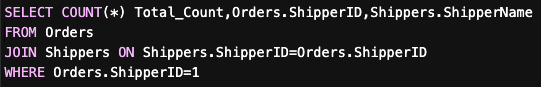 

This returns that the Speedy Express shipped a total of 54 orders.

ANSWER:

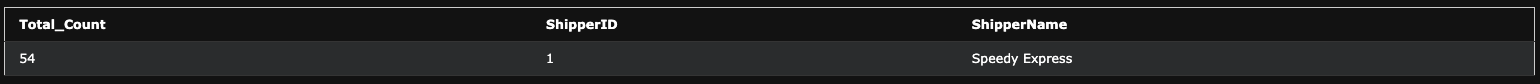

What is the last name of the employee with the most orders?

QUERY:

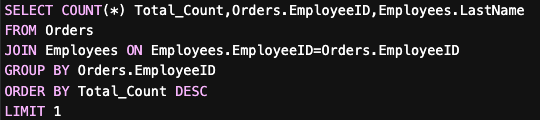

This returns that the Last Name, Peacock, has the most orders at 40 orders.

ANSWER:

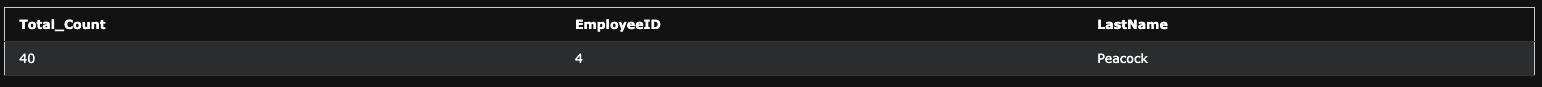

What product was ordered the most by customers in Germany?

QUERY:
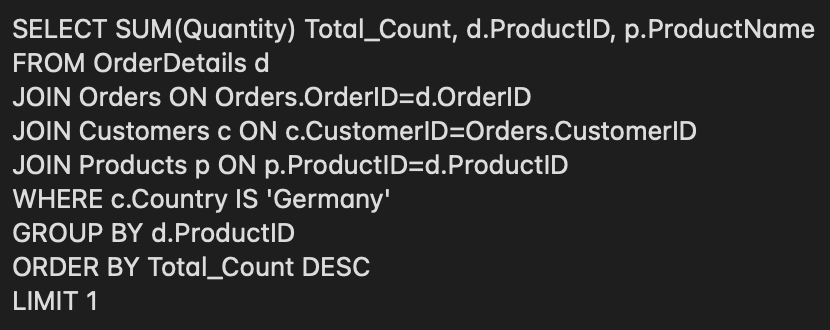

This returns that the Boston Crab Meat was the most ordered item by customers in Germany at a total of 140 units.

ANSWER: 
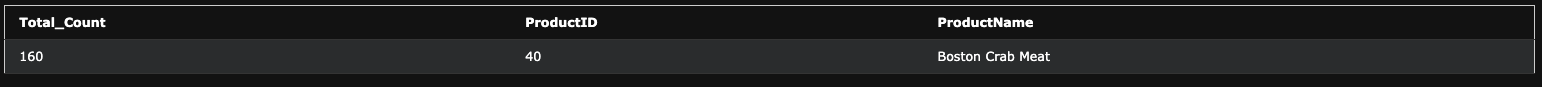
    